## Загрузка данных
#### Данные беру из Human_learning

# Colab

In [1]:
! gdown --id 1P3aYu5kdMLOVxgl2K6wjzx-HtWB5J_wu

"gdown" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


! unzip /content/uk_used_cars.zip -d /content/uk_used_cars/

In [2]:
! unzip / content / uk_used_cars.zip -d / content / uk_used_cars /

"unzip" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


In [11]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/uk_used_cars/bmw.csv')

In [5]:
df.head()

NameError: name 'df' is not defined

# Pycharm

In [1]:
from zipfile import ZipFile

with ZipFile('uk_used_cars.zip', 'r') as zf:
    zf.extractall()

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r'C:\PyCharm\Python\Data_Science_GM\4.Human_learning\bmw.csv')

In [3]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0


In [4]:
df.shape

(10781, 9)

# Обучающая, валидационная и тестовая выборка

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
train, test = train_test_split(df,train_size=0.6,random_state=42)

In [7]:
val, test = train_test_split(test,train_size=0.5,random_state=42)

# Список фичей

In [8]:
X = ['model', 'year', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize']

cat_features = ['model', 'transmission', 'fuelType']

y = ['price']

In [ ]:
# Для colab
# ! pip install catboost

In [9]:
from catboost import CatBoostRegressor

In [10]:
parameters = {'cat_features': cat_features,
              'eval_metric': 'MAPE',
              'learning_rate': 0.08,
              'random_seed':42,
              'verbose':100}

In [11]:
model = CatBoostRegressor(**parameters)

In [12]:
model.fit(train[X],train[y],eval_set=(val[X],val[y]))

0:	learn: 0.4564416	test: 0.4521294	best: 0.4521294 (0)	total: 159ms	remaining: 2m 39s
100:	learn: 0.0875290	test: 0.0867329	best: 0.0867329 (100)	total: 2.44s	remaining: 21.7s
200:	learn: 0.0760834	test: 0.0779235	best: 0.0779235 (200)	total: 4.45s	remaining: 17.7s
300:	learn: 0.0708670	test: 0.0740290	best: 0.0740290 (300)	total: 6.48s	remaining: 15.1s
400:	learn: 0.0676240	test: 0.0718814	best: 0.0718814 (400)	total: 8.52s	remaining: 12.7s
500:	learn: 0.0654070	test: 0.0709221	best: 0.0708594 (496)	total: 10.6s	remaining: 10.5s
600:	learn: 0.0638577	test: 0.0704606	best: 0.0704490 (599)	total: 12.5s	remaining: 8.32s
700:	learn: 0.0622969	test: 0.0698226	best: 0.0698226 (700)	total: 14.5s	remaining: 6.2s
800:	learn: 0.0609583	test: 0.0694169	best: 0.0694004 (791)	total: 16.5s	remaining: 4.11s
900:	learn: 0.0596089	test: 0.0689968	best: 0.0689945 (895)	total: 18.6s	remaining: 2.04s
999:	learn: 0.0584626	test: 0.0686829	best: 0.0686377 (993)	total: 20.6s	remaining: 0us

bestTest = 0.06

# Проверка на тестовой выборке

In [13]:
test['price_pred'] = model.predict(test[X])

In [14]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

In [15]:
def error(y_true,y_pred):
  print(mean_absolute_error(y_true,y_pred))
  print(mean_absolute_percentage_error(y_true,y_pred))

In [16]:
error(test['price'],test['price_pred'])

1537.5600657036578
0.0724718966452533


## Анализ ошибок

##### Добавим колонку ошибки, чтобы знать, на сколько модель занижает или завышает стоимость авто

##### Ошибки анализируются на тех данных, которые модель не видела, то есть на тестовых

In [17]:
test['error'] = test.price_pred - test.price

In [18]:
test.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred,error
4984,X6,2019,52990,Semi-Auto,3086,Diesel,145,34.9,3.0,56789.268481,3799.268481
4880,X1,2018,24081,Semi-Auto,13245,Diesel,150,60.1,2.0,22236.888207,-1844.111793
9132,1 Series,2016,12999,Automatic,68949,Petrol,200,43.5,2.0,13529.705791,530.705791
6451,1 Series,2020,11995,Semi-Auto,10,Petrol,150,34.5,2.0,31815.676673,19820.676673
7199,3 Series,2020,29875,Semi-Auto,150,Petrol,145,42.2,2.0,35549.276658,5674.276658


In [19]:
import matplotlib.pyplot as plt

plt.style.use('dark_background')
plt.style.use('seaborn-v0_8-colorblind')

##### Смотрим на симметричность модели, с помощью гистограммы и среднего.
##### Модель довольно симметричная

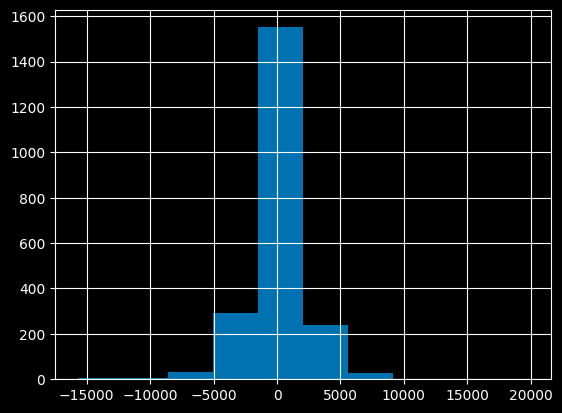

In [20]:
test.error.hist();

In [21]:
test.error.mean()

122.08788795070966

## Абсолютная ошибка

In [22]:
test['error_abs'] = abs(test.error)

In [23]:
test.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred,error,error_abs
4984,X6,2019,52990,Semi-Auto,3086,Diesel,145,34.9,3.0,56789.268481,3799.268481,3799.268481
4880,X1,2018,24081,Semi-Auto,13245,Diesel,150,60.1,2.0,22236.888207,-1844.111793,1844.111793
9132,1 Series,2016,12999,Automatic,68949,Petrol,200,43.5,2.0,13529.705791,530.705791,530.705791
6451,1 Series,2020,11995,Semi-Auto,10,Petrol,150,34.5,2.0,31815.676673,19820.676673,19820.676673
7199,3 Series,2020,29875,Semi-Auto,150,Petrol,145,42.2,2.0,35549.276658,5674.276658,5674.276658


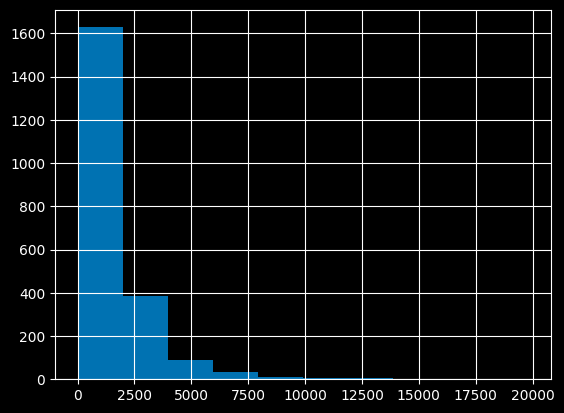

In [24]:
test.error_abs.hist();

In [25]:
test.error_abs.describe()

count     2157.000000
mean      1537.560066
std       1676.859544
min          0.083199
25%        489.152540
50%       1073.305750
75%       1946.619471
max      19820.676673
Name: error_abs, dtype: float64

##### Посмотрим топ 10 машин с самой большой ошибкой

In [26]:
test.sort_values('error_abs', ascending=False).head(10)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred,error,error_abs
6451,1 Series,2020,11995,Semi-Auto,10,Petrol,150,34.5,2.0,31815.676673,19820.676673,19820.676673
1244,4 Series,2020,47550,Semi-Auto,101,Diesel,145,60.1,2.0,31822.814760,-15727.185240,15727.185240
6866,4 Series,2020,42520,Semi-Auto,102,Diesel,145,65.7,2.0,28016.370190,-14503.629810,14503.629810
6592,M5,2019,70995,Semi-Auto,23,Petrol,145,24.1,4.4,85092.283023,14097.283023,14097.283023
2315,X2,2019,44980,Semi-Auto,500,Diesel,145,58.9,2.0,32052.149452,-12927.850548,12927.850548
6270,M4,2020,59999,Semi-Auto,3000,Petrol,150,28.5,3.0,47193.043921,-12805.956079,12805.956079
947,2 Series,2015,11998,Semi-Auto,30738,Diesel,20,68.9,2.0,24663.932331,12665.932331,12665.932331
6759,4 Series,2020,42495,Semi-Auto,18,Diesel,150,58.9,2.0,30133.732400,-12361.267600,12361.267600
4833,M4,2019,58662,Automatic,3395,Petrol,145,34.0,3.0,46802.901943,-11859.098057,11859.098057
6215,M4,2018,53999,Semi-Auto,8725,Petrol,145,33.6,3.0,42513.071957,-11485.928043,11485.928043


## Анализ абсолютной ошибки

##### Сгруппируем автомобили по цене для просмотра средней ошибки

In [27]:
test['price_group'] = pd.qcut(test.price, 5)  # qcut разбивает группу на интервалы, практически равные по количеству наблюдений

In [28]:
test.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred,error,error_abs,price_group
4984,X6,2019,52990,Semi-Auto,3086,Diesel,145,34.9,3.0,56789.268481,3799.268481,3799.268481,"(29990.0, 74990.0]"
4880,X1,2018,24081,Semi-Auto,13245,Diesel,150,60.1,2.0,22236.888207,-1844.111793,1844.111793,"(23131.6, 29990.0]"
9132,1 Series,2016,12999,Automatic,68949,Petrol,200,43.5,2.0,13529.705791,530.705791,530.705791,"(1199.999, 13995.0]"
6451,1 Series,2020,11995,Semi-Auto,10,Petrol,150,34.5,2.0,31815.676673,19820.676673,19820.676673,"(1199.999, 13995.0]"
7199,3 Series,2020,29875,Semi-Auto,150,Petrol,145,42.2,2.0,35549.276658,5674.276658,5674.276658,"(23131.6, 29990.0]"


##### Чем дешевле автомобиль, тем лучше результаты показывает модель и наоборот, чем дороже авто, тем хуже

In [29]:
test.groupby('price_group')['error_abs'].agg(['count', 'mean'])

,count,mean
price_group,,
"(1199.999, 13995.0]",435,911.712080
"(13995.0, 18500.0]",432,1151.556512
"(18500.0, 23131.6]",427,1318.846517
"(23131.6, 29990.0]",432,1749.723698
"(29990.0, 74990.0]",431,2560.143373


##### Средняя ошибка по всем автомобилям

In [30]:
test.error_abs.mean()

1537.5600657036578

##### Посмотрим направление ошибки
##### В своднике видно, что у дешёвых автомобилей есть тенденция к завышению цены, а у дорогих автомобилей есть тенденция к занижению

In [31]:
t = test.groupby('price_group')[['error_abs', 'error']].agg(['count', 'mean'])

In [32]:
t

error_abs              error            
                        count         mean count        mean
price_group                                                 
(1199.999, 13995.0]       435   911.712080   435  462.229738
(13995.0, 18500.0]        432  1151.556512   432  281.411969
(18500.0, 23131.6]        427  1318.846517   427  254.475675
(23131.6, 29990.0]        432  1749.723698   432  378.241254
(29990.0, 74990.0]        431  2560.143373   431 -768.811293

In [33]:
t.columns = ['_'.join(col).strip() for col in t.columns.values]

##### error_mean (error) - направление ошибки.
##### Дешёвым автомобилям модель завышает ошибку, а дорогим занижает

In [34]:
t.head()

,error_abs_count,error_abs_mean,error_count,error_mean
price_group,,,,
"(1199.999, 13995.0]",435,911.712080,435,462.229738
"(13995.0, 18500.0]",432,1151.556512,432,281.411969
"(18500.0, 23131.6]",427,1318.846517,427,254.475675
"(23131.6, 29990.0]",432,1749.723698,432,378.241254
"(29990.0, 74990.0]",431,2560.143373,431,-768.811293


In [35]:
t = t.drop('error_count', axis=1)

In [36]:
t.head()

,error_abs_count,error_abs_mean,error_mean
price_group,,,
"(1199.999, 13995.0]",435,911.712080,462.229738
"(13995.0, 18500.0]",432,1151.556512,281.411969
"(18500.0, 23131.6]",427,1318.846517,254.475675
"(23131.6, 29990.0]",432,1749.723698,378.241254
"(29990.0, 74990.0]",431,2560.143373,-768.811293


##### Разница со средней ошибкой в группе

In [37]:
t['mean_error_diff'] = t.error_abs_mean - test.error_abs.mean()

In [38]:
t.head()

,error_abs_count,error_abs_mean,error_mean,mean_error_diff
price_group,,,,
"(1199.999, 13995.0]",435,911.712080,462.229738,-625.847985
"(13995.0, 18500.0]",432,1151.556512,281.411969,-386.003554
"(18500.0, 23131.6]",427,1318.846517,254.475675,-218.713549
"(23131.6, 29990.0]",432,1749.723698,378.241254,212.163632
"(29990.0, 74990.0]",431,2560.143373,-768.811293,1022.583307


##### Для наглядности добавлю среднюю ошибку в таблицу

In [39]:
t['mean_error'] = test['error_abs'].mean()

In [40]:
t

,error_abs_count,error_abs_mean,error_mean,mean_error_diff,mean_error
price_group,,,,,
"(1199.999, 13995.0]",435,911.712080,462.229738,-625.847985,1537.560066
"(13995.0, 18500.0]",432,1151.556512,281.411969,-386.003554,1537.560066
"(18500.0, 23131.6]",427,1318.846517,254.475675,-218.713549,1537.560066
"(23131.6, 29990.0]",432,1749.723698,378.241254,212.163632,1537.560066
"(29990.0, 74990.0]",431,2560.143373,-768.811293,1022.583307,1537.560066


##### В таблицу, можно добавить условное форматирование по типу экселя, то есть подкрашивать необходимые ячейки цветом

In [41]:
import seaborn as sns
cm = sns.dark_palette("red", as_cmap=True)

#### В своднике видно: чем больше цена автомобиля, тем больше отклонение от средней ошибки
#### Отрицательное число показывает, что отклонение меньше средней ошибки, что хорошо

In [42]:
t.style.background_gradient(cmap=cm, subset=['mean_error_diff'])  # subset - выбор столбца

,error_abs_count,error_abs_mean,error_mean,mean_error_diff,mean_error
price_group,,,,,
"(1199.999, 13995.0]",435,911.712080,462.229738,-625.847985,1537.560066
"(13995.0, 18500.0]",432,1151.556512,281.411969,-386.003554,1537.560066
"(18500.0, 23131.6]",427,1318.846517,254.475675,-218.713549,1537.560066
"(23131.6, 29990.0]",432,1749.723698,378.241254,212.163632,1537.560066
"(29990.0, 74990.0]",431,2560.143373,-768.811293,1022.583307,1537.560066


## Анализ абсолютной ошибки относительно остальных переменных

##### Построим сводник по году

In [43]:
t = test.groupby('year')[['error_abs', 'error']].agg(['count', 'mean'])

In [44]:
t.columns = ['_'.join(col).strip() for col in t.columns.values]

In [45]:
t = t.drop('error_count', axis=1)

In [46]:
t['mean_error_diff'] = t.error_abs_mean - test.error_abs.mean()

In [47]:
t['mean_error'] = test['error_abs'].mean()

In [48]:
t

,error_abs_count,error_abs_mean,error_mean,mean_error_diff,mean_error
year,,,,,
1996,1,6339.136209,6339.136209,4801.576144,1537.560066
1999,1,890.056901,890.056901,-647.503164,1537.560066
2001,1,927.316449,927.316449,-610.243617,1537.560066
2002,2,2175.440983,-1069.308819,637.880917,1537.560066
2003,1,1482.424637,-1482.424637,-55.135428,1537.560066
2004,4,1902.279284,-305.313519,364.719218,1537.560066
2006,3,1660.249510,775.274447,122.689445,1537.560066
2007,2,1003.062275,1003.062275,-534.497791,1537.560066
2008,4,3182.698112,3182.698112,1645.138047,1537.560066


##### Если отбросить шумовые года, где мало данных +- до 2011 года и смотреть с 2011 до 2017 года, то видно, что ошибка в данных ниже среднего и модель предсказывает лучше среднего
##### А на новых автомобилях (18-20 год) ошибка становится выше среднего

In [49]:
t.style.background_gradient(cmap=cm, subset=['mean_error_diff'])  # subset - выбор столбца

,error_abs_count,error_abs_mean,error_mean,mean_error_diff,mean_error
year,,,,,
1996,1,6339.136209,6339.136209,4801.576144,1537.560066
1999,1,890.056901,890.056901,-647.503164,1537.560066
2001,1,927.316449,927.316449,-610.243617,1537.560066
2002,2,2175.440983,-1069.308819,637.880917,1537.560066
2003,1,1482.424637,-1482.424637,-55.135428,1537.560066
2004,4,1902.279284,-305.313519,364.719218,1537.560066
2006,3,1660.249510,775.274447,122.689445,1537.560066
2007,2,1003.062275,1003.062275,-534.497791,1537.560066
2008,4,3182.698112,3182.698112,1645.138047,1537.560066


#### Для того, чтобы в дальнейшем не переписывать много одинакового кода, создадим функцию

In [50]:
def print_error(col):
    t = test.groupby(col)[['error_abs', 'error']].agg(['count', 'mean'])
    t.columns = ['_'.join(col).strip() for col in t.columns.values]
    t = t.drop('error_count', axis=1)
    t['mean_error_diff'] = t.error_abs_mean - test.error_abs.mean()
    t['mean_error'] = test['error_abs'].mean()
    display(t.style.background_gradient(cmap=cm, subset=['mean_error_diff']))
    print(t)

##### Проверим работоспособность функции на уже проанализированных данных по году

In [51]:
print_error('year')

,error_abs_count,error_abs_mean,error_mean,mean_error_diff,mean_error
year,,,,,
1996,1,6339.136209,6339.136209,4801.576144,1537.560066
1999,1,890.056901,890.056901,-647.503164,1537.560066
2001,1,927.316449,927.316449,-610.243617,1537.560066
2002,2,2175.440983,-1069.308819,637.880917,1537.560066
2003,1,1482.424637,-1482.424637,-55.135428,1537.560066
2004,4,1902.279284,-305.313519,364.719218,1537.560066
2006,3,1660.249510,775.274447,122.689445,1537.560066
2007,2,1003.062275,1003.062275,-534.497791,1537.560066
2008,4,3182.698112,3182.698112,1645.138047,1537.560066


      error_abs_count  error_abs_mean   error_mean  mean_error_diff  \
year                                                                  
1996                1     6339.136209  6339.136209      4801.576144   
1999                1      890.056901   890.056901      -647.503164   
2001                1      927.316449   927.316449      -610.243617   
2002                2     2175.440983 -1069.308819       637.880917   
2003                1     1482.424637 -1482.424637       -55.135428   
2004                4     1902.279284  -305.313519       364.719218   
2006                3     1660.249510   775.274447       122.689445   
2007                2     1003.062275  1003.062275      -534.497791   
2008                4     3182.698112  3182.698112      1645.138047   
2009                6      703.048594    84.183919      -834.511472   
2010                3     1059.354320   695.204249      -478.205745   
2011               12      605.873341   428.301728      -931.686725   
2012  

In [52]:
test.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred,error,error_abs,price_group
4984,X6,2019,52990,Semi-Auto,3086,Diesel,145,34.9,3.0,56789.268481,3799.268481,3799.268481,"(29990.0, 74990.0]"
4880,X1,2018,24081,Semi-Auto,13245,Diesel,150,60.1,2.0,22236.888207,-1844.111793,1844.111793,"(23131.6, 29990.0]"
9132,1 Series,2016,12999,Automatic,68949,Petrol,200,43.5,2.0,13529.705791,530.705791,530.705791,"(1199.999, 13995.0]"
6451,1 Series,2020,11995,Semi-Auto,10,Petrol,150,34.5,2.0,31815.676673,19820.676673,19820.676673,"(1199.999, 13995.0]"
7199,3 Series,2020,29875,Semi-Auto,150,Petrol,145,42.2,2.0,35549.276658,5674.276658,5674.276658,"(23131.6, 29990.0]"


##### Посмотрим данные по трансмиссии:
##### Данные с ручной коробкой показывают лучший результат

In [53]:
print_error('transmission')

,error_abs_count,error_abs_mean,error_mean,mean_error_diff,mean_error
transmission,,,,,
Automatic,695,1494.208611,36.406949,-43.351455,1537.560066
Manual,504,1079.145745,142.507574,-458.414320,1537.560066
Semi-Auto,958,1810.180189,173.504100,272.620124,1537.560066


              error_abs_count  error_abs_mean  error_mean  mean_error_diff  \
transmission                                                                 
Automatic                 695     1494.208611   36.406949       -43.351455   
Manual                    504     1079.145745  142.507574      -458.414320   
Semi-Auto                 958     1810.180189  173.504100       272.620124   

               mean_error  
transmission               
Automatic     1537.560066  
Manual        1537.560066  
Semi-Auto     1537.560066  


##### Посмотрим на данные по пробегу, но для начала разобьём данные на группы

In [54]:
test['mileage_group'] = pd.qcut(test.mileage, 5)

In [55]:
test.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred,error,error_abs,price_group,mileage_group
4984,X6,2019,52990,Semi-Auto,3086,Diesel,145,34.9,3.0,56789.268481,3799.268481,3799.268481,"(29990.0, 74990.0]","(0.999, 4063.2]"
4880,X1,2018,24081,Semi-Auto,13245,Diesel,150,60.1,2.0,22236.888207,-1844.111793,1844.111793,"(23131.6, 29990.0]","(9825.4, 24299.0]"
9132,1 Series,2016,12999,Automatic,68949,Petrol,200,43.5,2.0,13529.705791,530.705791,530.705791,"(1199.999, 13995.0]","(43519.8, 190000.0]"
6451,1 Series,2020,11995,Semi-Auto,10,Petrol,150,34.5,2.0,31815.676673,19820.676673,19820.676673,"(1199.999, 13995.0]","(0.999, 4063.2]"
7199,3 Series,2020,29875,Semi-Auto,150,Petrol,145,42.2,2.0,35549.276658,5674.276658,5674.276658,"(23131.6, 29990.0]","(0.999, 4063.2]"


##### Модель больше всего ошибается на новых машинах, у которых меньше всего пробег

In [56]:
print_error('mileage_group')

,error_abs_count,error_abs_mean,error_mean,mean_error_diff,mean_error
mileage_group,,,,,
"(0.999, 4063.2]",432,2433.845556,293.238143,896.285490,1537.560066
"(4063.2, 9825.4]",431,1725.080432,67.411269,187.520367,1537.560066
"(9825.4, 24299.0]",432,1395.285364,65.804632,-142.274702,1537.560066
"(24299.0, 43519.8]",430,1141.553935,13.742028,-396.006130,1537.560066
"(43519.8, 190000.0]",432,990.635754,169.615201,-546.924311,1537.560066


                     error_abs_count  error_abs_mean  error_mean  \
mileage_group                                                      
(0.999, 4063.2]                  432     2433.845556  293.238143   
(4063.2, 9825.4]                 431     1725.080432   67.411269   
(9825.4, 24299.0]                432     1395.285364   65.804632   
(24299.0, 43519.8]               430     1141.553935   13.742028   
(43519.8, 190000.0]              432      990.635754  169.615201   

                     mean_error_diff   mean_error  
mileage_group                                      
(0.999, 4063.2]           896.285490  1537.560066  
(4063.2, 9825.4]          187.520367  1537.560066  
(9825.4, 24299.0]        -142.274702  1537.560066  
(24299.0, 43519.8]       -396.006130  1537.560066  
(43519.8, 190000.0]      -546.924311  1537.560066  


##### Посмотрим данные на типе топлива

In [57]:
print_error('fuelType')

,error_abs_count,error_abs_mean,error_mean,mean_error_diff,mean_error
fuelType,,,,,
Diesel,1394,1437.061117,98.276014,-100.498949,1537.560066
Hybrid,64,1558.853198,-352.158801,21.293132,1537.560066
Other,5,944.136410,-941.902308,-593.423655,1537.560066
Petrol,694,1741.738585,221.317702,204.178520,1537.560066


          error_abs_count  error_abs_mean  error_mean  mean_error_diff  \
fuelType                                                                 
Diesel               1394     1437.061117   98.276014      -100.498949   
Hybrid                 64     1558.853198 -352.158801        21.293132   
Other                   5      944.136410 -941.902308      -593.423655   
Petrol                694     1741.738585  221.317702       204.178520   

           mean_error  
fuelType               
Diesel    1537.560066  
Hybrid    1537.560066  
Other     1537.560066  
Petrol    1537.560066  


##### Посмотрим данные по налогу

In [58]:
test['tax_group'] = pd.qcut(test.tax, 5, duplicates='drop')  # Выкинем дубликаты для избежания ошибки

In [59]:
test.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred,error,error_abs,price_group,mileage_group,tax_group
4984,X6,2019,52990,Semi-Auto,3086,Diesel,145,34.9,3.0,56789.268481,3799.268481,3799.268481,"(29990.0, 74990.0]","(0.999, 4063.2]","(125.0, 145.0]"
4880,X1,2018,24081,Semi-Auto,13245,Diesel,150,60.1,2.0,22236.888207,-1844.111793,1844.111793,"(23131.6, 29990.0]","(9825.4, 24299.0]","(145.0, 150.0]"
9132,1 Series,2016,12999,Automatic,68949,Petrol,200,43.5,2.0,13529.705791,530.705791,530.705791,"(1199.999, 13995.0]","(43519.8, 190000.0]","(150.0, 580.0]"
6451,1 Series,2020,11995,Semi-Auto,10,Petrol,150,34.5,2.0,31815.676673,19820.676673,19820.676673,"(1199.999, 13995.0]","(0.999, 4063.2]","(145.0, 150.0]"
7199,3 Series,2020,29875,Semi-Auto,150,Petrol,145,42.2,2.0,35549.276658,5674.276658,5674.276658,"(23131.6, 29990.0]","(0.999, 4063.2]","(125.0, 145.0]"


In [60]:
print_error('tax_group')

,error_abs_count,error_abs_mean,error_mean,mean_error_diff,mean_error
tax_group,,,,,
"(-0.001, 125.0]",512,823.722414,91.176598,-713.837651,1537.560066
"(125.0, 145.0]",1131,1807.424736,117.301327,269.864670,1537.560066
"(145.0, 150.0]",252,1707.575874,118.514950,170.015808,1537.560066
"(150.0, 580.0]",262,1604.063700,206.593848,66.503634,1537.560066


                 error_abs_count  error_abs_mean  error_mean  mean_error_diff  \
tax_group                                                                       
(-0.001, 125.0]              512      823.722414   91.176598      -713.837651   
(125.0, 145.0]              1131     1807.424736  117.301327       269.864670   
(145.0, 150.0]               252     1707.575874  118.514950       170.015808   
(150.0, 580.0]               262     1604.063700  206.593848        66.503634   

                  mean_error  
tax_group                     
(-0.001, 125.0]  1537.560066  
(125.0, 145.0]   1537.560066  
(145.0, 150.0]   1537.560066  
(150.0, 580.0]   1537.560066  


##### Самая большая ошибка получается на самых новых машинах

In [61]:
test.groupby('tax_group')[['price', 'year']].agg(['count', 'mean'])

price                year             
                count          mean count         mean
tax_group                                             
(-0.001, 125.0]   512  13264.859375   512  2015.365234
(125.0, 145.0]   1131  27536.747126  1131  2018.382847
(145.0, 150.0]    252  25288.376984   252  2018.166667
(150.0, 580.0]    262  18207.576336   262  2014.118321

##### Посмотрим на данные по расходу (mpg - сколько миль можно проехать на 1 галоне топлива)

##### Чтобы перевести mpg в л/100км нужно: 235.22 / mpg
##### Чтобы перевести л/100км в mpg нужно: 235.22 /  л/100км
##### Простыми словами, чем меньше mpg, тем выше расход

In [62]:
test['mpg_group'] = pd.qcut(test.mpg, 5)

In [63]:
test.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred,error,error_abs,price_group,mileage_group,tax_group,mpg_group
4984,X6,2019,52990,Semi-Auto,3086,Diesel,145,34.9,3.0,56789.268481,3799.268481,3799.268481,"(29990.0, 74990.0]","(0.999, 4063.2]","(125.0, 145.0]","(5.499, 42.2]"
4880,X1,2018,24081,Semi-Auto,13245,Diesel,150,60.1,2.0,22236.888207,-1844.111793,1844.111793,"(23131.6, 29990.0]","(9825.4, 24299.0]","(145.0, 150.0]","(55.4, 64.2]"
9132,1 Series,2016,12999,Automatic,68949,Petrol,200,43.5,2.0,13529.705791,530.705791,530.705791,"(1199.999, 13995.0]","(43519.8, 190000.0]","(150.0, 580.0]","(42.2, 50.4]"
6451,1 Series,2020,11995,Semi-Auto,10,Petrol,150,34.5,2.0,31815.676673,19820.676673,19820.676673,"(1199.999, 13995.0]","(0.999, 4063.2]","(145.0, 150.0]","(5.499, 42.2]"
7199,3 Series,2020,29875,Semi-Auto,150,Petrol,145,42.2,2.0,35549.276658,5674.276658,5674.276658,"(23131.6, 29990.0]","(0.999, 4063.2]","(125.0, 145.0]","(5.499, 42.2]"


In [64]:
print_error('mpg_group')

,error_abs_count,error_abs_mean,error_mean,mean_error_diff,mean_error
mpg_group,,,,,
"(5.499, 42.2]",444,2159.412978,227.429403,621.852912,1537.560066
"(42.2, 50.4]",487,1664.200649,361.406267,126.640583,1537.560066
"(50.4, 55.4]",380,1517.852124,46.756860,-19.707942,1537.560066
"(55.4, 64.2]",449,1238.191642,-105.163252,-299.368424,1537.560066
"(64.2, 470.8]",397,1044.181685,39.825594,-493.378380,1537.560066


               error_abs_count  error_abs_mean  error_mean  mean_error_diff  \
mpg_group                                                                     
(5.499, 42.2]              444     2159.412978  227.429403       621.852912   
(42.2, 50.4]               487     1664.200649  361.406267       126.640583   
(50.4, 55.4]               380     1517.852124   46.756860       -19.707942   
(55.4, 64.2]               449     1238.191642 -105.163252      -299.368424   
(64.2, 470.8]              397     1044.181685   39.825594      -493.378380   

                mean_error  
mpg_group                   
(5.499, 42.2]  1537.560066  
(42.2, 50.4]   1537.560066  
(50.4, 55.4]   1537.560066  
(55.4, 64.2]   1537.560066  
(64.2, 470.8]  1537.560066  


In [65]:
test.groupby('mpg_group')[['price', 'year']].agg(['count', 'mean'])

price                year             
              count          mean count         mean
mpg_group                                           
(5.499, 42.2]   444  32876.211712   444  2017.743243
(42.2, 50.4]    487  23569.260780   487  2017.451745
(50.4, 55.4]    380  21489.018421   380  2017.194737
(55.4, 64.2]    449  18276.222717   449  2016.443207
(64.2, 470.8]   397  16704.297229   397  2016.727960

In [66]:
test.groupby('year').mpg.agg(['count', 'mean'])

,count,mean
year,,
1996,1,26.400000
1999,1,31.000000
2001,1,27.700000
2002,2,28.950000
2003,1,26.400000
2004,4,27.125000
2006,3,37.566667
2007,2,36.850000
2008,4,41.075000


##### В целом тренд идёт на сокращение расхода топлива, но в более поздних машинах попались экземпляры с высоким расходом
##### График mpg по годам (чем выше, тем меньше расход)

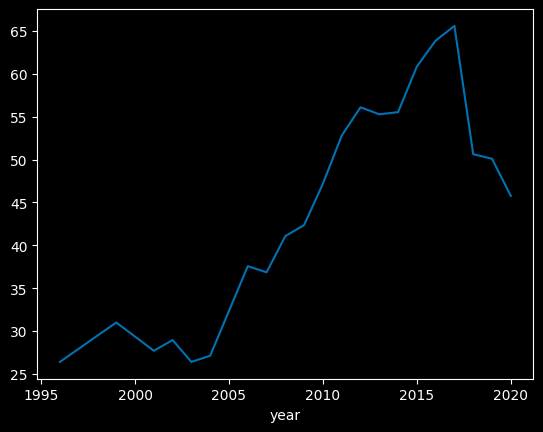

In [67]:
test.groupby('year').mpg.mean().plot();

##### Посмотрим данные по объёму двигателя

In [68]:
test.groupby('year').engineSize.agg(['count', 'mean'])

,count,mean
year,,
1996,1,2.800000
1999,1,2.800000
2001,1,3.000000
2002,2,2.200000
2003,1,3.000000
2004,4,2.775000
2006,3,1.866667
2007,2,2.500000
2008,4,2.625000


##### График объёма двигателя по годам:

In [69]:
test.engineSize.value_counts()

2.0    1323
3.0     495
1.5     278
1.6      24
4.4      15
0.0       7
2.5       4
2.2       3
2.8       2
3.2       2
4.0       2
0.6       1
6.6       1
Name: engineSize, dtype: int64

In [70]:
test['engine_group'] = pd.cut(test.engineSize, [0 ,1.5, 2, float('inf')])

In [71]:
test.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred,error,error_abs,price_group,mileage_group,tax_group,mpg_group,engine_group
4984,X6,2019,52990,Semi-Auto,3086,Diesel,145,34.9,3.0,56789.268481,3799.268481,3799.268481,"(29990.0, 74990.0]","(0.999, 4063.2]","(125.0, 145.0]","(5.499, 42.2]","(2.0, inf]"
4880,X1,2018,24081,Semi-Auto,13245,Diesel,150,60.1,2.0,22236.888207,-1844.111793,1844.111793,"(23131.6, 29990.0]","(9825.4, 24299.0]","(145.0, 150.0]","(55.4, 64.2]","(1.5, 2.0]"
9132,1 Series,2016,12999,Automatic,68949,Petrol,200,43.5,2.0,13529.705791,530.705791,530.705791,"(1199.999, 13995.0]","(43519.8, 190000.0]","(150.0, 580.0]","(42.2, 50.4]","(1.5, 2.0]"
6451,1 Series,2020,11995,Semi-Auto,10,Petrol,150,34.5,2.0,31815.676673,19820.676673,19820.676673,"(1199.999, 13995.0]","(0.999, 4063.2]","(145.0, 150.0]","(5.499, 42.2]","(1.5, 2.0]"
7199,3 Series,2020,29875,Semi-Auto,150,Petrol,145,42.2,2.0,35549.276658,5674.276658,5674.276658,"(23131.6, 29990.0]","(0.999, 4063.2]","(125.0, 145.0]","(5.499, 42.2]","(1.5, 2.0]"


##### Чем больше объём движка, тем модель сильнее ошибается

In [72]:
print_error('engine_group')

,error_abs_count,error_abs_mean,error_mean,mean_error_diff,mean_error
engine_group,,,,,
"(0.0, 1.5]",279,1135.531674,149.248281,-402.028392,1537.560066
"(1.5, 2.0]",1347,1423.236324,60.610112,-114.323742,1537.560066
"(2.0, inf]",524,2049.868683,265.297889,512.308617,1537.560066


              error_abs_count  error_abs_mean  error_mean  mean_error_diff  \
engine_group                                                                 
(0.0, 1.5]                279     1135.531674  149.248281      -402.028392   
(1.5, 2.0]               1347     1423.236324   60.610112      -114.323742   
(2.0, inf]                524     2049.868683  265.297889       512.308617   

               mean_error  
engine_group               
(0.0, 1.5]    1537.560066  
(1.5, 2.0]    1537.560066  
(2.0, inf]    1537.560066  


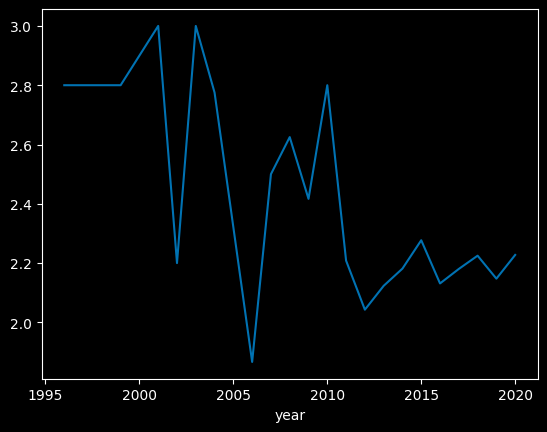

In [73]:
test.groupby('year').engineSize.mean().plot();

##### Посмотрим на данные по модели

In [117]:
print_error('model')

,error_abs_count,error_abs_mean,error_mean,mean_error_diff,mean_error
model,,,,,
1 Series,381,1194.311617,55.623839,-343.248449,1537.560066
2 Series,237,1389.965171,192.186465,-147.594895,1537.560066
3 Series,499,1355.692418,63.756704,-181.867648,1537.560066
4 Series,203,1686.099936,-49.587893,148.539871,1537.560066
5 Series,216,1587.859992,188.397477,50.299926,1537.560066
6 Series,17,1864.737066,740.014597,327.177000,1537.560066
7 Series,19,3034.690317,-1632.958667,1497.130251,1537.560066
8 Series,4,3053.702352,-2506.798194,1516.142287,1537.560066
M2,10,2853.991753,2730.294541,1316.431687,1537.560066


           error_abs_count  error_abs_mean   error_mean  mean_error_diff  \
model                                                                      
 1 Series              381     1194.311617    55.623839      -343.248449   
 2 Series              237     1389.965171   192.186465      -147.594895   
 3 Series              499     1355.692418    63.756704      -181.867648   
 4 Series              203     1686.099936   -49.587893       148.539871   
 5 Series              216     1587.859992   188.397477        50.299926   
 6 Series               17     1864.737066   740.014597       327.177000   
 7 Series               19     3034.690317 -1632.958667      1497.130251   
 8 Series                4     3053.702352 -2506.798194      1516.142287   
 M2                     10     2853.991753  2730.294541      1316.431687   
 M3                      5     1994.304279   228.230036       456.744213   
 M4                     19     3966.349181 -1659.983380      2428.789116   
 M5         

## Feature importances

##### Все фичи отсортированы по убыванию их важности

In [74]:
model.get_feature_importance(prettified=True)

,Feature Id,Importances
0,year,21.663393
1,engineSize,19.886510
2,mileage,17.956035
3,model,16.587238
4,mpg,14.284600
5,fuelType,4.843232
6,transmission,3.381356
7,tax,1.397635


## Shap

##### Данная библиотека показывает какой вклад внесла фича в формаровании предикта
##### Позволяет интерпретировать модели машинного обучения, позволяя считать вклад каждой фичи в предсказание

In [131]:
# Для colab
# !pip install shap

In [75]:
import shap
shap.initjs()

In [77]:
X

['model',
 'year',
 'transmission',
 'mileage',
 'fuelType',
 'tax',
 'mpg',
 'engineSize']

In [78]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(test[X])

In [79]:
shap_values

array([[ 8311.4850192 ,  3980.87656957,  1463.00573686, ...,
          196.71656162,  7303.93176972,  4667.78434525],
       [ -562.03741649,   301.74383455,   951.97942598, ...,
           64.16118672, -1051.2256274 ,  -731.72082808],
       [-2557.85929134, -1952.00414331,   228.39731651, ...,
         -209.53042485,  1371.35571085, -1007.7715943 ],
       ...,
       [ 1331.25654416,  3296.08869578,   254.48126078, ...,
          263.61074481, -1327.86410005,  -998.35681221],
       [-1168.52929755, -2089.34588653,   191.54983151, ...,
         -370.59592538, -1726.06178252,  -697.55090663],
       [-3834.87409984,  2975.95964594,   662.31737074, ...,
          166.9116802 ,  -693.40993096,  -950.18438034]])

##### Вклад фичи в финальный предикт

In [94]:
pd.DataFrame(shap_values, columns=X).head()

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,8311.485019,3980.876570,1463.005737,4864.958351,3232.159966,196.716562,7303.931770,4667.784345
1,-562.037416,301.743835,951.979426,519.712494,-24.075024,64.161187,-1051.225627,-731.720828
2,-2557.859291,-1952.004143,228.397317,-4370.190404,-741.041540,-209.530425,1371.355711,-1007.771594
3,-3191.649446,4348.735937,599.557903,4344.961576,-1474.265490,-344.199525,7046.878577,-2282.693020
4,137.767669,6915.041139,897.684328,6120.097476,-1272.080140,54.600912,1584.427320,-1656.612208


##### Финальный предикт формируется из базового значения

In [81]:
train.price.mean()

22768.483920841063

##### Если ячейка с Shap`ом не запускается, то перед кодом нужно добавить
shap.initjs()

##### Красным показано, что все фичи увеличивали предикт
##### Самый большой вклад в данном случае дала модель (т.к x6 априори дорогая модель)

In [132]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], test[X].iloc[0,:])

In [89]:
test.head(1)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred,error,error_abs,price_group,mileage_group,tax_group,mpg_group,engine_group
4984,X6,2019,52990,Semi-Auto,3086,Diesel,145,34.9,3.0,56789.268481,3799.268481,3799.268481,"(29990.0, 74990.0]","(0.999, 4063.2]","(125.0, 145.0]","(5.499, 42.2]","(2.0, inf]"


##### Проанализируем вклад расхода (mpg)

<Axes: >

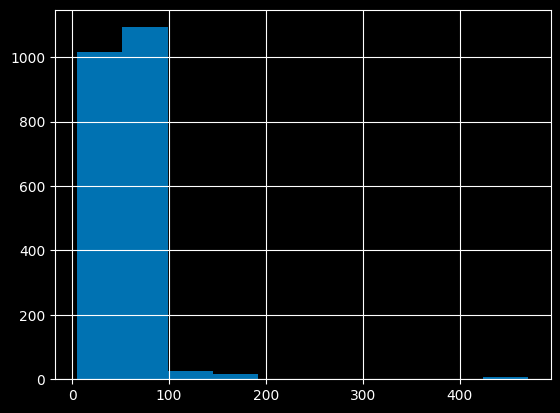

In [86]:
test.mpg.hist();

##### Только у 6% машин расход выше, чем у данного x6. То есть это один из самых больших расходов в выборке (или один из самых маленьких mpg)

In [88]:
(test.mpg < 34.9).mean()

0.06212331942512749

## Топ 10 ошибок с помощью shap

##### Возьмём датафрейм со вкладом фич и переименуем колонки

In [93]:
pd.DataFrame(shap_values, columns=X).head()

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,8311.485019,3980.876570,1463.005737,4864.958351,3232.159966,196.716562,7303.931770,4667.784345
1,-562.037416,301.743835,951.979426,519.712494,-24.075024,64.161187,-1051.225627,-731.720828
2,-2557.859291,-1952.004143,228.397317,-4370.190404,-741.041540,-209.530425,1371.355711,-1007.771594
3,-3191.649446,4348.735937,599.557903,4344.961576,-1474.265490,-344.199525,7046.878577,-2282.693020
4,137.767669,6915.041139,897.684328,6120.097476,-1272.080140,54.600912,1584.427320,-1656.612208


In [91]:
shap_cols = [x+'_shap' for x in X]

In [92]:
shap_cols

['model_shap',
 'year_shap',
 'transmission_shap',
 'mileage_shap',
 'fuelType_shap',
 'tax_shap',
 'mpg_shap',
 'engineSize_shap']

##### Создадим ДФ из Shap значний

In [96]:
shap_values_df = pd.DataFrame(shap_values, columns=shap_cols)

In [97]:
shap_values_df.head()

,model_shap,year_shap,transmission_shap,mileage_shap,fuelType_shap,tax_shap,mpg_shap,engineSize_shap
0,8311.485019,3980.876570,1463.005737,4864.958351,3232.159966,196.716562,7303.931770,4667.784345
1,-562.037416,301.743835,951.979426,519.712494,-24.075024,64.161187,-1051.225627,-731.720828
2,-2557.859291,-1952.004143,228.397317,-4370.190404,-741.041540,-209.530425,1371.355711,-1007.771594
3,-3191.649446,4348.735937,599.557903,4344.961576,-1474.265490,-344.199525,7046.878577,-2282.693020
4,137.767669,6915.041139,897.684328,6120.097476,-1272.080140,54.600912,1584.427320,-1656.612208


##### Добавим столбцы из нового ДФ в ДФ test
##### По умолчанию concat склеивает по вертикали, а для того, чтобы склеить по горизонтали: axis=1

In [99]:
pd.concat([test, shap_values_df], axis=1)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred,...,mpg_group,engine_group,model_shap,year_shap,transmission_shap,mileage_shap,fuelType_shap,tax_shap,mpg_shap,engineSize_shap
4984,X6,2019.0,52990.0,Semi-Auto,3086.0,Diesel,145.0,34.9,3.0,56789.268481,...,"(5.499, 42.2]","(2.0, inf]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4880,X1,2018.0,24081.0,Semi-Auto,13245.0,Diesel,150.0,60.1,2.0,22236.888207,...,"(55.4, 64.2]","(1.5, 2.0]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9132,1 Series,2016.0,12999.0,Automatic,68949.0,Petrol,200.0,43.5,2.0,13529.705791,...,"(42.2, 50.4]","(1.5, 2.0]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6451,1 Series,2020.0,11995.0,Semi-Auto,10.0,Petrol,150.0,34.5,2.0,31815.676673,...,"(5.499, 42.2]","(1.5, 2.0]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7199,3 Series,2020.0,29875.0,Semi-Auto,150.0,Petrol,145.0,42.2,2.0,35549.276658,...,"(5.499, 42.2]","(1.5, 2.0]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,50.154439,3527.292958,774.733322,1387.939115,-1143.643683,182.993136,-899.014932,-872.283651
2151,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1677.122885,-626.704945,1083.332516,-903.984735,252.037148,357.752686,-1907.530710,-879.736832
2153,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-937.230018,4128.877652,449.394203,1939.237643,-1539.789666,170.712067,885.092764,2955.162742
2155,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-1168.529298,-2089.345887,191.549832,-4610.373744,1502.199214,-370.595925,-1726.061783,-697.550907


##### Конкатенация произошла неверно, т.к. количество строк в новом ДФ не совпадает с тестом

In [100]:
len(test)

2157

##### Для решения проблемы нужно сбросить индекс у ДС тест, так как shap_values_df индекс идёт с нуля

In [102]:
test_shap = pd.concat([test.reset_index(), shap_values_df], axis=1)

In [103]:
test_shap.head()

,index,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,...,mpg_group,engine_group,model_shap,year_shap,transmission_shap,mileage_shap,fuelType_shap,tax_shap,mpg_shap,engineSize_shap
0,4984,X6,2019,52990,Semi-Auto,3086,Diesel,145,34.9,3.0,...,"(5.499, 42.2]","(2.0, inf]",8311.485019,3980.876570,1463.005737,4864.958351,3232.159966,196.716562,7303.931770,4667.784345
1,4880,X1,2018,24081,Semi-Auto,13245,Diesel,150,60.1,2.0,...,"(55.4, 64.2]","(1.5, 2.0]",-562.037416,301.743835,951.979426,519.712494,-24.075024,64.161187,-1051.225627,-731.720828
2,9132,1 Series,2016,12999,Automatic,68949,Petrol,200,43.5,2.0,...,"(42.2, 50.4]","(1.5, 2.0]",-2557.859291,-1952.004143,228.397317,-4370.190404,-741.041540,-209.530425,1371.355711,-1007.771594
3,6451,1 Series,2020,11995,Semi-Auto,10,Petrol,150,34.5,2.0,...,"(5.499, 42.2]","(1.5, 2.0]",-3191.649446,4348.735937,599.557903,4344.961576,-1474.265490,-344.199525,7046.878577,-2282.693020
4,7199,3 Series,2020,29875,Semi-Auto,150,Petrol,145,42.2,2.0,...,"(5.499, 42.2]","(1.5, 2.0]",137.767669,6915.041139,897.684328,6120.097476,-1272.080140,54.600912,1584.427320,-1656.612208


##### Отсортируем ДФ по убыванию абсолютной ошибки

In [105]:
test_shap = test_shap.sort_values('error_abs', ascending=False)

In [106]:
test_shap.head()

,index,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,...,mpg_group,engine_group,model_shap,year_shap,transmission_shap,mileage_shap,fuelType_shap,tax_shap,mpg_shap,engineSize_shap
3,6451,1 Series,2020,11995,Semi-Auto,10,Petrol,150,34.5,2.0,...,"(5.499, 42.2]","(1.5, 2.0]",-3191.649446,4348.735937,599.557903,4344.961576,-1474.265490,-344.199525,7046.878577,-2282.693020
144,1244,4 Series,2020,47550,Semi-Auto,101,Diesel,145,60.1,2.0,...,"(55.4, 64.2]","(1.5, 2.0]",-104.479186,5182.943839,677.382931,4770.282152,386.823223,181.037349,-1100.984160,-938.541551
1914,6866,4 Series,2020,42520,Semi-Auto,102,Diesel,145,65.7,2.0,...,"(64.2, 470.8]","(1.5, 2.0]",-164.479811,4387.541547,614.274945,4198.937818,-57.662328,181.648133,-2841.705569,-1070.534707
1349,6592,M5,2019,70995,Semi-Auto,23,Petrol,145,24.1,4.4,...,"(5.499, 42.2]","(2.0, inf]",13054.103088,4340.189600,2185.334863,9822.539987,661.055741,145.413544,22742.361574,9372.934464
706,2315,X2,2019,44980,Semi-Auto,500,Diesel,145,58.9,2.0,...,"(55.4, 64.2]","(1.5, 2.0]",3716.360225,2802.188759,927.076271,5460.684012,164.840088,-147.249380,-1339.477898,-2300.622786


##### Построим график для ошибки первой машины с самой большой абсолютной ошибкой

In [133]:
shap.initjs()
shap.force_plot(explainer.expected_value, test_shap[shap_cols].values[0,:], test_shap[X].iloc[0,:])

##### команда для отображения всех колонок ДФ, если они отображаются не корректно
pd.options.display.max_columns = 100

##### Цена машины 11995, а предсказали ей 31815 (Абс ошибка 19820)
##### В теории кажется, что цена 12 тысяч - очень низкая для 1 серии 20 года. Нужно это проверить

In [110]:
test_shap.head(1)

,index,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,...,mpg_group,engine_group,model_shap,year_shap,transmission_shap,mileage_shap,fuelType_shap,tax_shap,mpg_shap,engineSize_shap
3,6451,1 Series,2020,11995,Semi-Auto,10,Petrol,150,34.5,2.0,...,"(5.499, 42.2]","(1.5, 2.0]",-3191.649446,4348.735937,599.557903,4344.961576,-1474.26549,-344.199525,7046.878577,-2282.69302


##### Посмотрим на прогнозирование в зависимости от модели

In [114]:
print_error('model')

,error_abs_count,error_abs_mean,error_mean,mean_error_diff,mean_error
model,,,,,
1 Series,381,1194.311617,55.623839,-343.248449,1537.560066
2 Series,237,1389.965171,192.186465,-147.594895,1537.560066
3 Series,499,1355.692418,63.756704,-181.867648,1537.560066
4 Series,203,1686.099936,-49.587893,148.539871,1537.560066
5 Series,216,1587.859992,188.397477,50.299926,1537.560066
6 Series,17,1864.737066,740.014597,327.177000,1537.560066
7 Series,19,3034.690317,-1632.958667,1497.130251,1537.560066
8 Series,4,3053.702352,-2506.798194,1516.142287,1537.560066
M2,10,2853.991753,2730.294541,1316.431687,1537.560066


           error_abs_count  error_abs_mean   error_mean  mean_error_diff  \
model                                                                      
 1 Series              381     1194.311617    55.623839      -343.248449   
 2 Series              237     1389.965171   192.186465      -147.594895   
 3 Series              499     1355.692418    63.756704      -181.867648   
 4 Series              203     1686.099936   -49.587893       148.539871   
 5 Series              216     1587.859992   188.397477        50.299926   
 6 Series               17     1864.737066   740.014597       327.177000   
 7 Series               19     3034.690317 -1632.958667      1497.130251   
 8 Series                4     3053.702352 -2506.798194      1516.142287   
 M2                     10     2853.991753  2730.294541      1316.431687   
 M3                      5     1994.304279   228.230036       456.744213   
 M4                     19     3966.349181 -1659.983380      2428.789116   
 M5         

##### Отфильтруем только модели 1 серии

In [120]:
train[train['model'] == ' 1 Series']

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
5703,1 Series,2019,20750,Manual,4619,Petrol,150,44.1,1.5
1926,1 Series,2019,17980,Semi-Auto,8211,Diesel,145,74.3,2.0
2562,1 Series,2019,29490,Semi-Auto,7656,Petrol,150,34.5,2.0
4667,1 Series,2017,17950,Semi-Auto,17988,Diesel,145,61.4,2.0
6818,1 Series,2019,28994,Semi-Auto,2973,Diesel,145,48.7,2.0
...,...,...,...,...,...,...,...,...,...
10627,1 Series,2015,11000,Automatic,25345,Petrol,145,48.7,1.6
9274,1 Series,2014,7990,Manual,73824,Diesel,30,65.7,2.0
10583,1 Series,2018,12700,Manual,20758,Petrol,145,53.3,1.5
5191,1 Series,2016,19950,Semi-Auto,23210,Petrol,200,39.8,3.0


##### Посмотрим график цент

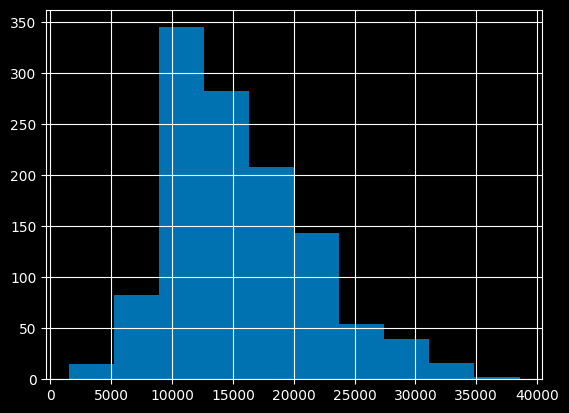

In [123]:
train[train['model'] == ' 1 Series'].price.hist();

##### Посмотрим среднюю цену для модели 1 серии 20 года

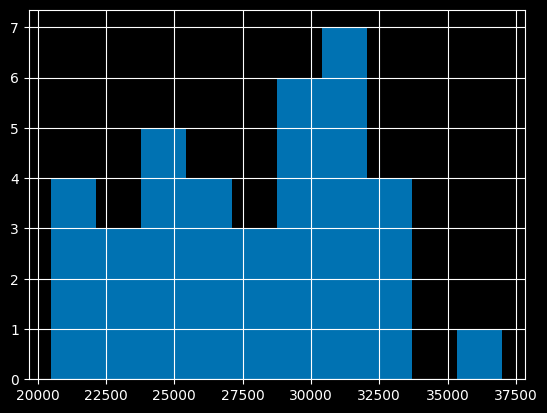

In [125]:
train[(train['model'] == ' 1 Series') & (train['year'] == 2020)].price.hist();

#### Получается что машина за 1 серии 20 года в тестовой выборке стоимостью 12000 - нонсенс, т.к. в обучающей выборке и близко нет похожей машины и цены начинаются +- с 20000

##### Возьмём весь ДФ и посмотрим его гистограмму
##### Оказывается это 1 единственная машина с такой ценой, то есть выброс

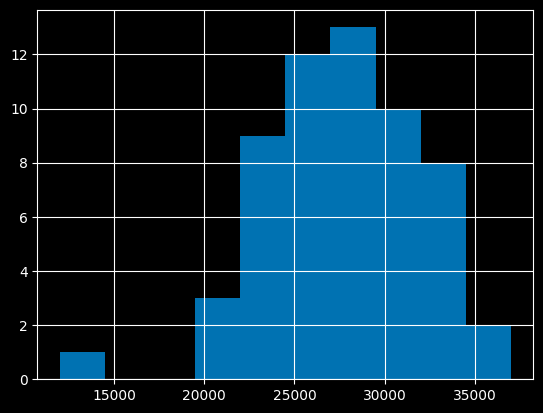

In [127]:
df[(df['model'] == ' 1 Series') & (df['year'] == 2020)].price.hist();

##### График цены и за что получается завышение и занижение
##### Интерактивность графика работает только в Colab ???

#### Посмотрим топ 10 машин по абсолютной ошибке

In [140]:
pd.options.display.max_columns = 100

In [141]:
test_shap.head(10)

,index,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred,error,error_abs,price_group,mileage_group,tax_group,mpg_group,engine_group,model_shap,year_shap,transmission_shap,mileage_shap,fuelType_shap,tax_shap,mpg_shap,engineSize_shap
3,6451,1 Series,2020,11995,Semi-Auto,10,Petrol,150,34.5,2.0,31815.676673,19820.676673,19820.676673,"(1199.999, 13995.0]","(0.999, 4063.2]","(145.0, 150.0]","(5.499, 42.2]","(1.5, 2.0]",-3191.649446,4348.735937,599.557903,4344.961576,-1474.265490,-344.199525,7046.878577,-2282.693020
144,1244,4 Series,2020,47550,Semi-Auto,101,Diesel,145,60.1,2.0,31822.814760,-15727.185240,15727.185240,"(29990.0, 74990.0]","(0.999, 4063.2]","(125.0, 145.0]","(55.4, 64.2]","(1.5, 2.0]",-104.479186,5182.943839,677.382931,4770.282152,386.823223,181.037349,-1100.984160,-938.541551
1914,6866,4 Series,2020,42520,Semi-Auto,102,Diesel,145,65.7,2.0,28016.370190,-14503.629810,14503.629810,"(29990.0, 74990.0]","(0.999, 4063.2]","(125.0, 145.0]","(64.2, 470.8]","(1.5, 2.0]",-164.479811,4387.541547,614.274945,4198.937818,-57.662328,181.648133,-2841.705569,-1070.534707
1349,6592,M5,2019,70995,Semi-Auto,23,Petrol,145,24.1,4.4,85092.283023,14097.283023,14097.283023,"(29990.0, 74990.0]","(0.999, 4063.2]","(125.0, 145.0]","(5.499, 42.2]","(2.0, inf]",13054.103088,4340.189600,2185.334863,9822.539987,661.055741,145.413544,22742.361574,9372.934464
706,2315,X2,2019,44980,Semi-Auto,500,Diesel,145,58.9,2.0,32052.149452,-12927.850548,12927.850548,"(29990.0, 74990.0]","(0.999, 4063.2]","(125.0, 145.0]","(55.4, 64.2]","(1.5, 2.0]",3716.360225,2802.188759,927.076271,5460.684012,164.840088,-147.249380,-1339.477898,-2300.622786
1696,6270,M4,2020,59999,Semi-Auto,3000,Petrol,150,28.5,3.0,47193.043921,-12805.956079,12805.956079,"(29990.0, 74990.0]","(0.999, 4063.2]","(145.0, 150.0]","(5.499, 42.2]","(2.0, inf]",7010.078099,4342.899412,1229.667463,3988.047528,-3641.477807,-454.367335,7790.023618,4159.822781
225,947,2 Series,2015,11998,Semi-Auto,30738,Diesel,20,68.9,2.0,24663.932331,12665.932331,12665.932331,"(1199.999, 13995.0]","(24299.0, 43519.8]","(-0.001, 125.0]","(64.2, 470.8]","(1.5, 2.0]",-142.952171,-117.105790,2372.039235,-202.173410,-273.597648,-333.738637,1237.085630,-643.975040
1769,6759,4 Series,2020,42495,Semi-Auto,18,Diesel,150,58.9,2.0,30133.732400,-12361.267600,12361.267600,"(29990.0, 74990.0]","(0.999, 4063.2]","(145.0, 150.0]","(55.4, 64.2]","(1.5, 2.0]",-12.874451,4581.318226,703.577961,3691.153574,421.879398,-368.122961,-709.162598,-942.386912
829,4833,M4,2019,58662,Automatic,3395,Petrol,145,34.0,3.0,46802.901943,-11859.098057,11859.098057,"(29990.0, 74990.0]","(0.999, 4063.2]","(125.0, 145.0]","(5.499, 42.2]","(2.0, inf]",6610.751000,2895.952851,914.420683,5091.051603,-2089.501341,89.938364,5986.371296,4535.567326
302,6215,M4,2018,53999,Semi-Auto,8725,Petrol,145,33.6,3.0,42513.071957,-11485.928043,11485.928043,"(29990.0, 74990.0]","(4063.2, 9825.4]","(125.0, 145.0]","(5.499, 42.2]","(2.0, inf]",7052.087916,-914.919105,1321.261475,1519.314884,-1891.316663,-69.006103,8408.566754,4318.732639


In [137]:
shap.initjs()
shap.force_plot(explainer.expected_value, test_shap[shap_cols].head(10).values, test_shap[X].head(10))

##### Сортировка - сверху по горизонтали
##### Отдельные фичи - слева по вертикали

##### Можно построить график по всем данным

In [142]:
shap.initjs()
shap.force_plot(explainer.expected_value, test_shap[shap_cols].values, test_shap[X])

## Dependence plot (график зависимотей)

In [144]:
X

['model',
 'year',
 'transmission',
 'mileage',
 'fuelType',
 'tax',
 'mpg',
 'engineSize']

##### На графике видно, что чем больше год, тем дороже машина
##### На графике автоматически выбирается дополнительная переменная, чтобы подкрашивать доп наблюдения
##### Например в 15 году автомобили, которые стоют дороже почему то имеют меньший объём двигателя

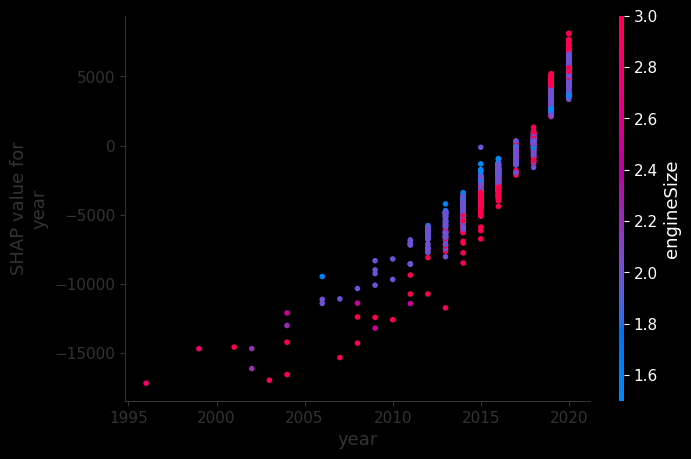

In [147]:
shap.dependence_plot('year', shap_values, test[X])

##### Смотрим график по трансмисии

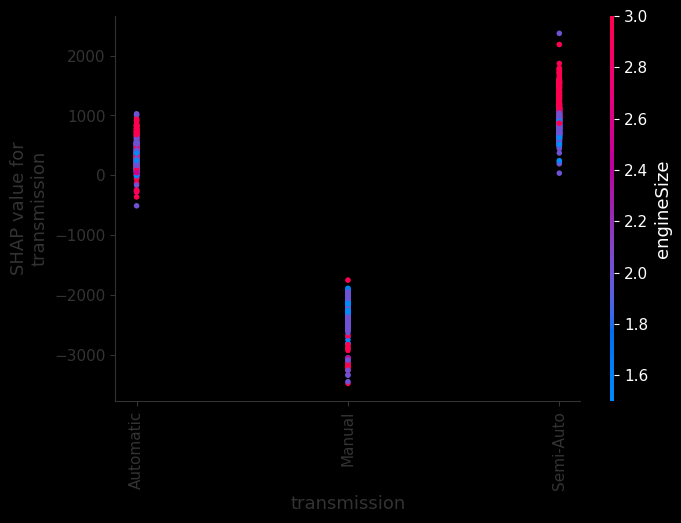

In [148]:
shap.dependence_plot('transmission', shap_values, test[X])

##### Смотрим график по моделям, где видно за какие модели прибавляет больше, а за какие меньше

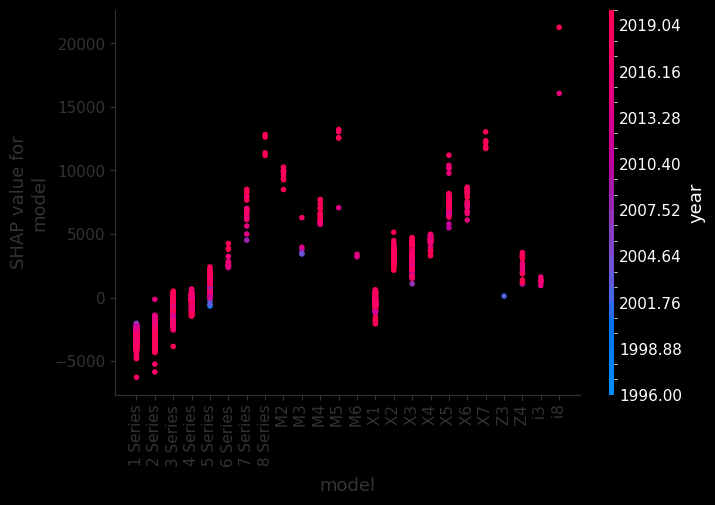

In [149]:
shap.dependence_plot('model', shap_values, test[X])

##### Чем больше mpg, тем меньше автомобилю прибавляют

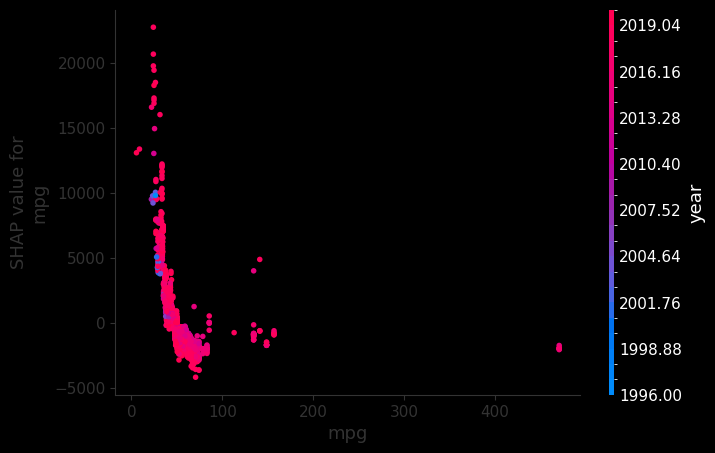

In [150]:
shap.dependence_plot('mpg', shap_values, test[X])

##### Пробег

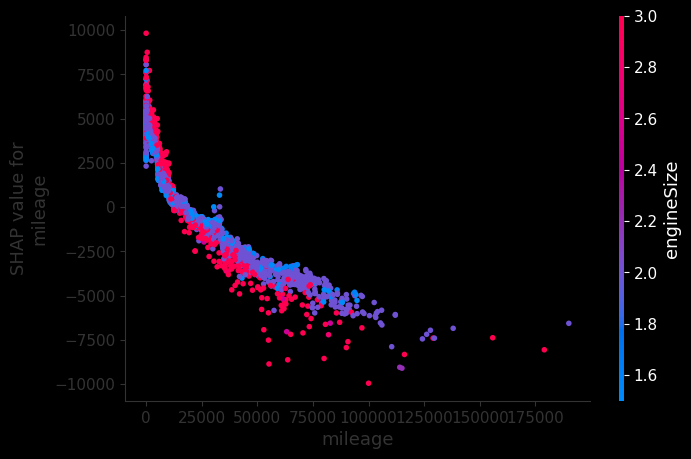

In [151]:
shap.dependence_plot('mileage', shap_values, test[X])

##### Тип топлива. Гибриды и дизеля дороже, чем бензин

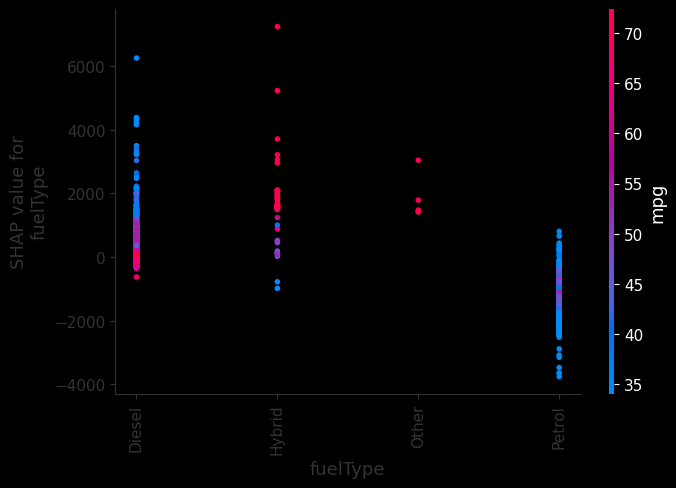

In [153]:
shap.dependence_plot('fuelType', shap_values, test[X])

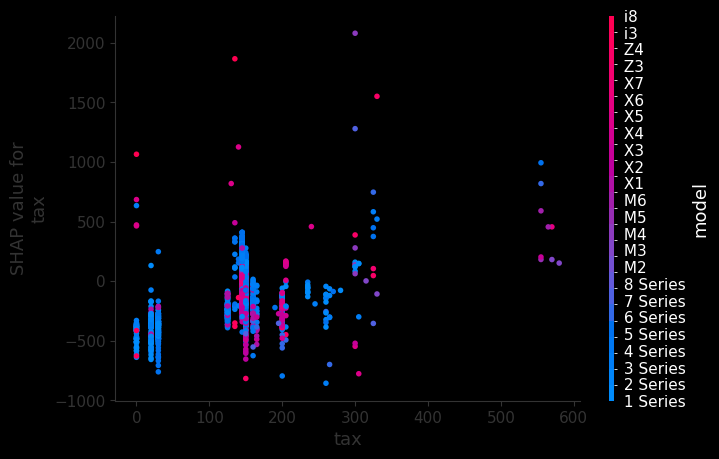

In [154]:
shap.dependence_plot('tax', shap_values, test[X])

##### Чем больше двигатель, тем дороже

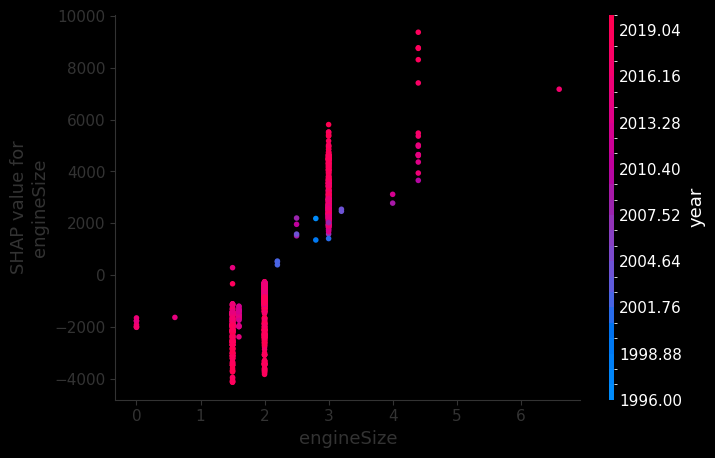

In [155]:
shap.dependence_plot('engineSize', shap_values, test[X])